Scanning /cmp folder for results...
✓ mistralai_devstral-small-2505: 34.91s, json
✓ qwen_qwen3-next-80b-a3b-instruct: 6.57s, json
✓ amazon_nova-lite-v1: 7.41s, json
✓ meituan_longcat-flash-chat_free: 19.83s, json
✓ mistralai_mistral-small-3.2-24b-instruct_free: 4.94s, json
✓ deepseek_deepseek-chat-v3-0324: 33.65s, json
✓ qwen_qwen-turbo: 9.07s, json
✓ z-ai_glm-4-32b: 11.77s, json
✓ deepseek_deepseek-v3.2-exp: 20.97s, txt
✓ nvidia_nemotron-nano-9b-v2_free: 20.37s, json
✓ qwen_qwen3-32b: 29.84s, json
✓ deepseek_deepseek-r1-distill-llama-70b: 9.2s, json
✓ alibaba_tongyi-deepresearch-30b-a3b_free: 5.19s, json
✓ openai_gpt-oss-safeguard-20b: 2.85s, json
✓ tngtech_deepseek-r1t-chimera_free: 13.37s, json
✓ mistralai_devstral-small: 22.83s, json
✓ deepseek_deepseek-r1-0528-qwen3-8b_free: 11.22s, json
✓ mistralai_mistral-7b-instruct: 24.94s, json
✓ openai_gpt-4.1-nano: 11.88s, json
✓ deepseek_deepseek-chat-v3.1: 13.72s, json
✓ google_gemma-3-27b-it: 30.37s, txt
✓ nvidia_nemotron-nano-12b-v2-vl_

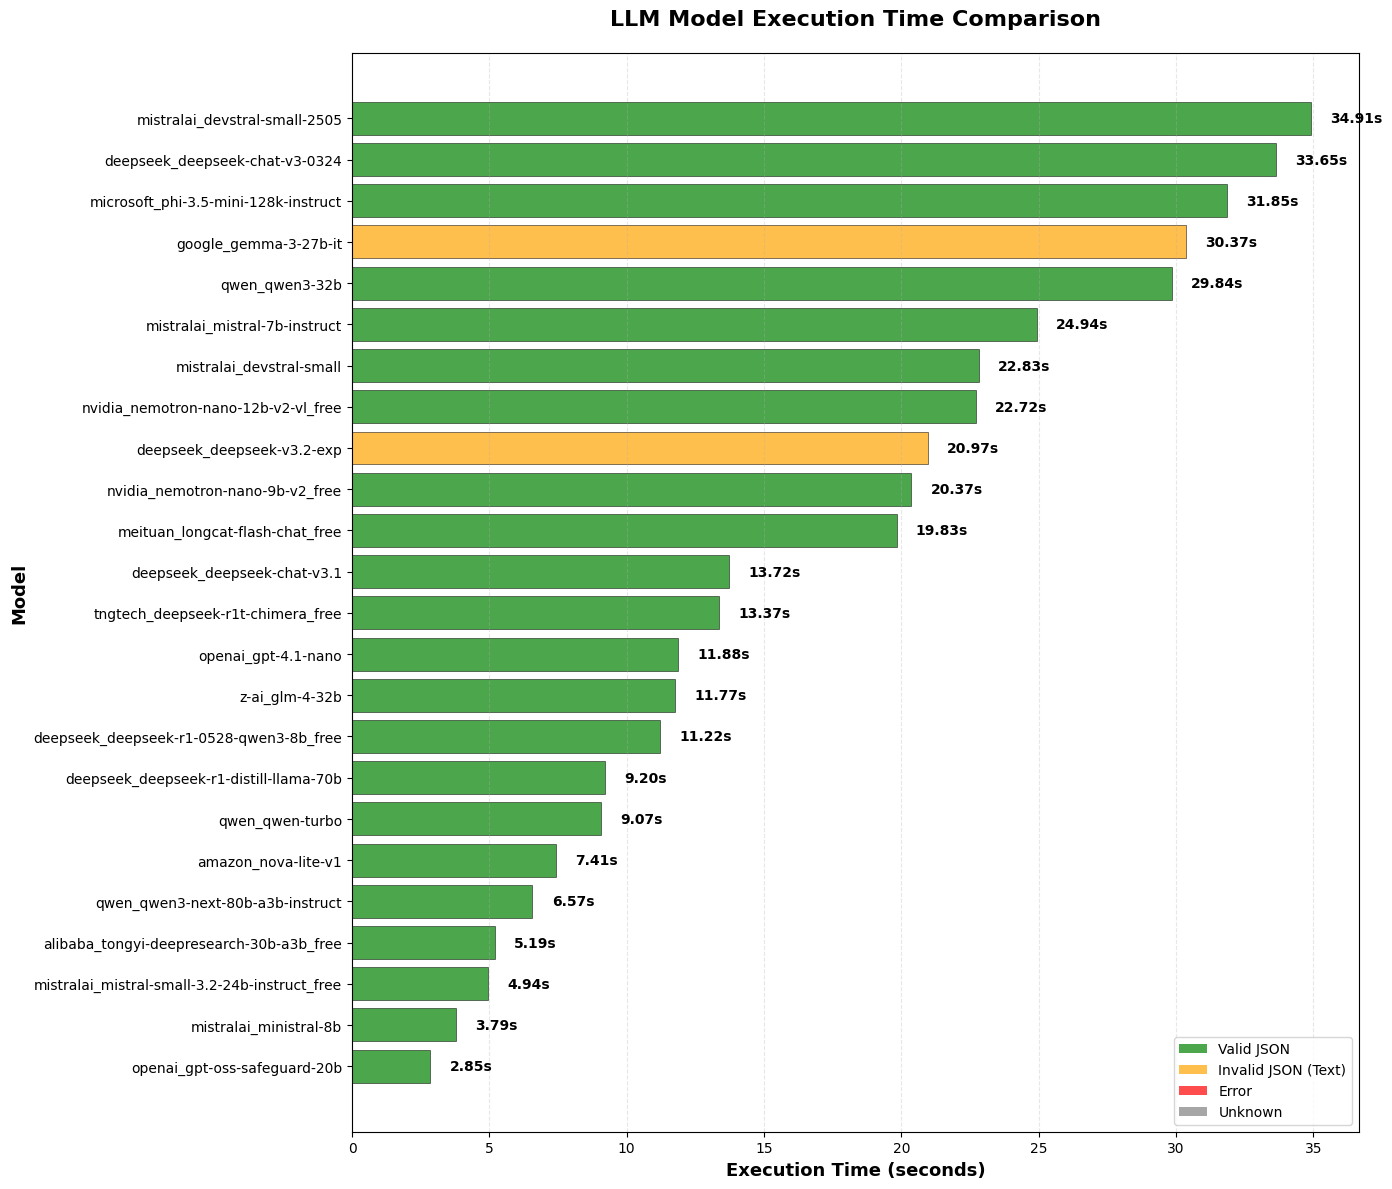

📈 Response type plot saved to: /home/catalin/dev/job-market/cmp/response_type_distribution.png


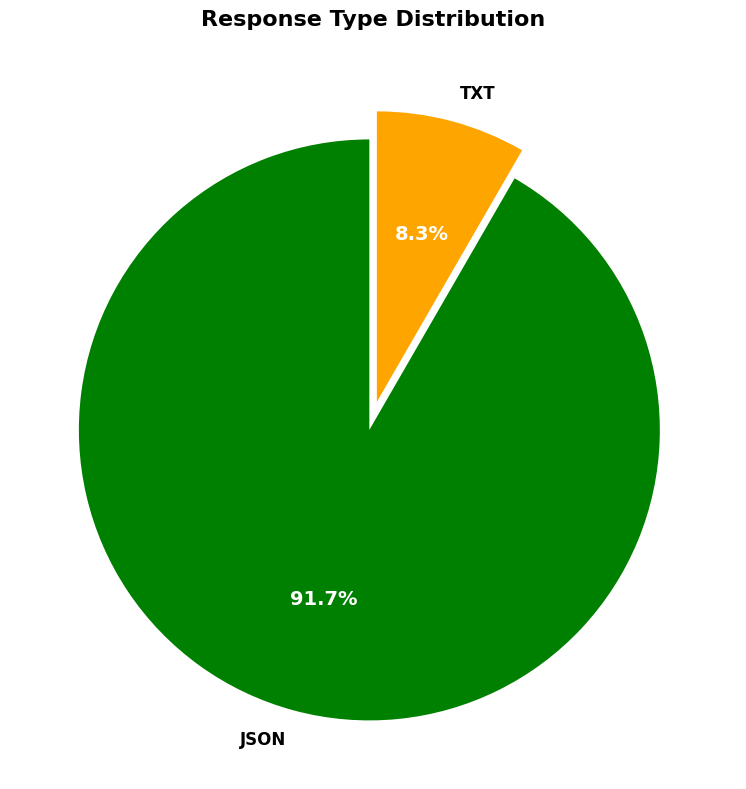


Checking schema compliance...
✓ mistralai_devstral-small-2505: 58/58 fields (100.0%)
✓ qwen_qwen3-next-80b-a3b-instruct: 58/58 fields (100.0%)
✓ amazon_nova-lite-v1: 58/58 fields (100.0%)
✓ meituan_longcat-flash-chat_free: 58/58 fields (100.0%)
✓ mistralai_mistral-small-3.2-24b-instruct_free: 58/58 fields (100.0%)
✓ deepseek_deepseek-chat-v3-0324: 58/58 fields (100.0%)
✓ qwen_qwen-turbo: 58/58 fields (100.0%)
✓ z-ai_glm-4-32b: 58/58 fields (100.0%)
✓ nvidia_nemotron-nano-9b-v2_free: 58/58 fields (100.0%)
✓ qwen_qwen3-32b: 58/58 fields (100.0%)
✓ deepseek_deepseek-r1-distill-llama-70b: 58/58 fields (100.0%)
✓ alibaba_tongyi-deepresearch-30b-a3b_free: 58/58 fields (100.0%)
✓ openai_gpt-oss-safeguard-20b: 58/58 fields (100.0%)
✓ tngtech_deepseek-r1t-chimera_free: 58/58 fields (100.0%)
✓ mistralai_devstral-small: 58/58 fields (100.0%)
✓ deepseek_deepseek-r1-0528-qwen3-8b_free: 58/58 fields (100.0%)
✓ mistralai_mistral-7b-instruct: 58/58 fields (100.0%)
✓ openai_gpt-4.1-nano: 58/58 fields 

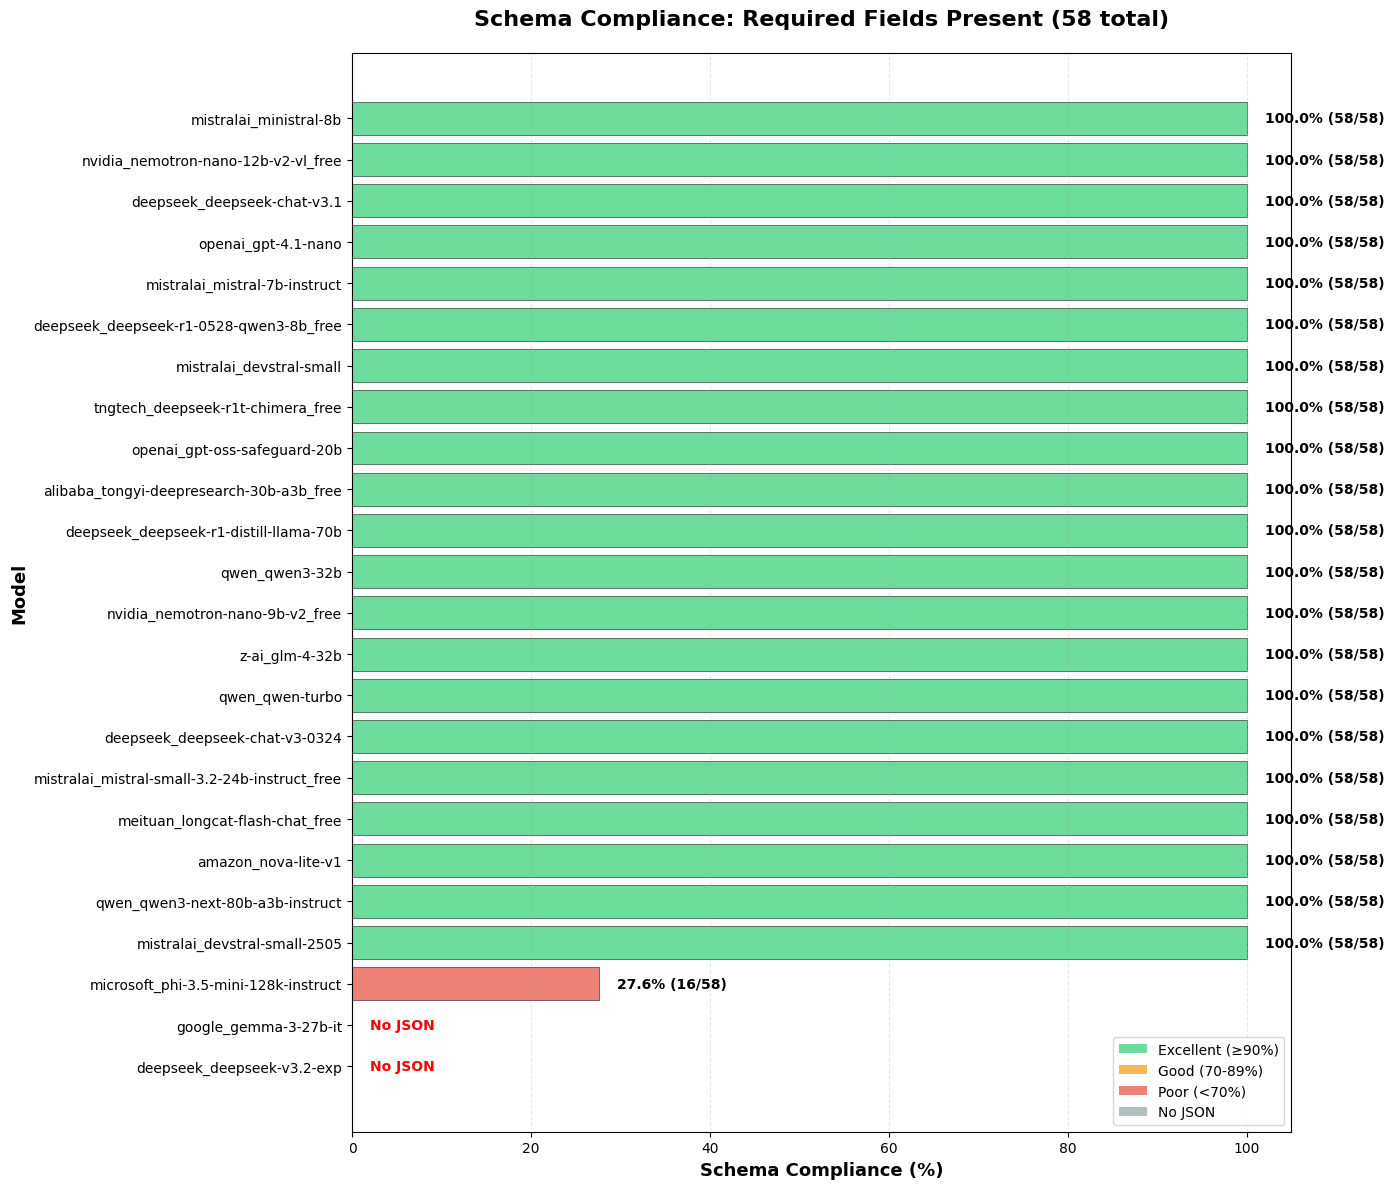


SCHEMA COMPLIANCE STATISTICS

📊 Average Compliance: 96.7%
   Models with JSON: 22/24
   Perfect compliance (100%): 21
   Excellent (≥90%): 21
   Good (70-89%): 0
   Poor (<70%): 1

FIELD COMPLIANCE TABLE (Total Required: 58)

Rank   Model                                         Present    Missing    %        Status
-----------------------------------------------------------------------------------------------
1      alibaba_tongyi-deepresearch-30b-a3b_free      58         0           100.0% ✅ PERFECT
2      amazon_nova-lite-v1                           58         0           100.0% ✅ PERFECT
3      deepseek_deepseek-chat-v3-0324                58         0           100.0% ✅ PERFECT
4      deepseek_deepseek-chat-v3.1                   58         0           100.0% ✅ PERFECT
5      deepseek_deepseek-r1-0528-qwen3-8b_free       58         0           100.0% ✅ PERFECT
6      deepseek_deepseek-r1-distill-llama-70b        58         0           100.0% ✅ PERFECT
7      meituan_longcat-flash

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# SCAN CMP FOLDER
# ============================================
CMP_DIR = Path("cmp")

if not CMP_DIR.exists():
    print("❌ /cmp folder not found!")
    exit()

results = []

print("="*80)
print("Scanning /cmp folder for results...")
print("="*80)

for model_dir in CMP_DIR.iterdir():
    if not model_dir.is_dir():
        continue
    
    model_name = model_dir.name
    result = {
        "model": model_name,
        "time": None,
        "status": None,
        "response_type": None
    }
    
    # Read time
    time_file = model_dir / "time.txt"
    if time_file.exists():
        with open(time_file, "r", encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                if "Execution Time:" in line:
                    try:
                        result["time"] = float(line.split(":")[1].strip().split()[0])
                    except:
                        pass
                if "Response Status:" in line:
                    try:
                        result["status"] = int(line.split(":")[1].strip())
                    except:
                        pass
    
    # Check response type
    if (model_dir / "response.json").exists():
        result["response_type"] = "json"
    elif (model_dir / "response.txt").exists():
        result["response_type"] = "txt"
    elif (model_dir / "error.txt").exists():
        result["response_type"] = "error"
    else:
        result["response_type"] = "unknown"
    
    results.append(result)
    print(f"✓ {model_name}: {result['time']}s, {result['response_type']}")

print(f"\n📊 Found {len(results)} model results")

# ============================================
# PREPARE DATA FOR PLOTTING
# ============================================
models = [r["model"] for r in results]
times = [r["time"] if r["time"] is not None else 0 for r in results]
response_types = [r["response_type"] for r in results]

# Create color mapping for response types
color_map = {
    "json": "green",
    "txt": "orange", 
    "error": "red",
    "unknown": "gray"
}
colors = [color_map.get(rt, "gray") for rt in response_types]

# ============================================
# PLOT 1: EXECUTION TIME BAR CHART
# ============================================
fig1, ax1 = plt.subplots(figsize=(14, max(6, len(models) * 0.5)))

# Sort by time for better visualization
sorted_indices = np.argsort(times)
sorted_models = [models[i] for i in sorted_indices]
sorted_times = [times[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

bars = ax1.barh(sorted_models, sorted_times, color=sorted_colors, alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.set_xlabel("Execution Time (seconds)", fontsize=13, fontweight='bold')
ax1.set_ylabel("Model", fontsize=13, fontweight='bold')
ax1.set_title("LLM Model Execution Time Comparison", fontsize=16, fontweight="bold", pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, time) in enumerate(zip(bars, sorted_times)):
    if time > 0:
        ax1.text(time + max(sorted_times) * 0.02, i, f"{time:.2f}s", 
                va='center', fontsize=10, fontweight='bold')

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_map['json'], label='Valid JSON', alpha=0.7),
    Patch(facecolor=color_map['txt'], label='Invalid JSON (Text)', alpha=0.7),
    Patch(facecolor=color_map['error'], label='Error', alpha=0.7),
    Patch(facecolor=color_map['unknown'], label='Unknown', alpha=0.7)
]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig(CMP_DIR / "execution_time_comparison.png", dpi=300, bbox_inches='tight')
print(f"\n📈 Execution time plot saved to: {(CMP_DIR / 'execution_time_comparison.png').absolute()}")
plt.show()

# ============================================
# PLOT 2: RESPONSE TYPE DISTRIBUTION
# ============================================
response_type_counts = {
    "json": response_types.count("json"),
    "txt": response_types.count("txt"),
    "error": response_types.count("error"),
    "unknown": response_types.count("unknown")
}

# Filter out zero counts
response_type_counts = {k: v for k, v in response_type_counts.items() if v > 0}

fig2, ax2 = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax2.pie(
    response_type_counts.values(),
    labels=[k.upper() for k in response_type_counts.keys()],
    colors=[color_map[k] for k in response_type_counts.keys()],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    explode=[0.05] * len(response_type_counts)  # Slightly separate slices
)

ax2.set_title("Response Type Distribution", fontsize=16, fontweight="bold", pad=20)

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

# Make label text bold
for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(12)

plt.tight_layout()
plt.savefig(CMP_DIR / "response_type_distribution.png", dpi=300, bbox_inches='tight')
print(f"📈 Response type plot saved to: {(CMP_DIR / 'response_type_distribution.png').absolute()}")
plt.show()

# ============================================
# PLOT 3: SCHEMA COMPLIANCE CHECK
# ============================================
print("\n" + "="*80)
print("Checking schema compliance...")
print("="*80)

# Required fields from the schema
REQUIRED_FIELDS = [
    "title", "job_function", "seniority_level", "industry", "department",
    "job_family", "specialization", "min_salary", "max_salary", "salary_currency",
    "salary_period", "commission_available", "bonus_structure", "minimum_education",
    "preferred_education", "experience_years", "experience_level_required",
    "languages", "language_proficiency", "hard_skills", "soft_skills",
    "certifications", "licenses_required", "responsibilities", "employment_type",
    "contract_type", "work_schedule", "shift_details", "hours_per_week",
    "remote_work", "travel_required", "travel_percentage", "street_address",
    "city", "region", "postal_code", "country", "full_address",
    "multiple_locations", "relocation_offered", "company_name", "company_size",
    "company_type", "contact_email", "contact_phone", "contact_person",
    "application_url", "benefits", "work_environment", "professional_development",
    "work_life_balance", "physical_requirements", "work_conditions",
    "special_requirements", "posting_date", "source_url", "job_board", "posting_id"
]

compliance_results = []

for model_dir in CMP_DIR.iterdir():
    if not model_dir.is_dir():
        continue
    
    model_name = model_dir.name
    json_file = model_dir / "response.json"
    
    if not json_file.exists():
        compliance_results.append({
            "model": model_name,
            "has_json": False,
            "fields_present": 0,
            "fields_missing": len(REQUIRED_FIELDS),
            "compliance_percentage": 0
        })
        continue
    
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        fields_present = sum(1 for field in REQUIRED_FIELDS if field in data)
        fields_missing = len(REQUIRED_FIELDS) - fields_present
        compliance_percentage = (fields_present / len(REQUIRED_FIELDS)) * 100
        
        compliance_results.append({
            "model": model_name,
            "has_json": True,
            "fields_present": fields_present,
            "fields_missing": fields_missing,
            "compliance_percentage": compliance_percentage
        })
        
        print(f"✓ {model_name}: {fields_present}/{len(REQUIRED_FIELDS)} fields ({compliance_percentage:.1f}%)")
        
    except Exception as e:
        print(f"❌ {model_name}: Error reading JSON - {e}")
        compliance_results.append({
            "model": model_name,
            "has_json": False,
            "fields_present": 0,
            "fields_missing": len(REQUIRED_FIELDS),
            "compliance_percentage": 0
        })

# Plot schema compliance
fig3, ax3 = plt.subplots(figsize=(14, max(6, len(compliance_results) * 0.5)))

# Sort by compliance percentage
sorted_compliance = sorted(compliance_results, key=lambda x: x["compliance_percentage"])
comp_models = [r["model"] for r in sorted_compliance]
comp_percentages = [r["compliance_percentage"] for r in sorted_compliance]

# Color based on compliance level
colors_compliance = []
for pct in comp_percentages:
    if pct >= 90:
        colors_compliance.append('#2ecc71')  # Green
    elif pct >= 70:
        colors_compliance.append('#f39c12')  # Orange
    elif pct > 0:
        colors_compliance.append('#e74c3c')  # Red
    else:
        colors_compliance.append('#95a5a6')  # Gray

bars = ax3.barh(comp_models, comp_percentages, color=colors_compliance, alpha=0.7, edgecolor='black', linewidth=0.5)
ax3.set_xlabel("Schema Compliance (%)", fontsize=13, fontweight='bold')
ax3.set_ylabel("Model", fontsize=13, fontweight='bold')
ax3.set_title(f"Schema Compliance: Required Fields Present ({len(REQUIRED_FIELDS)} total)", 
              fontsize=16, fontweight="bold", pad=20)
ax3.grid(axis='x', alpha=0.3, linestyle='--')
ax3.set_xlim(0, 105)

# Add percentage labels and field counts
for i, (bar, pct, result) in enumerate(zip(bars, comp_percentages, sorted_compliance)):
    if pct > 0:
        label = f"{pct:.1f}% ({result['fields_present']}/{len(REQUIRED_FIELDS)})"
        ax3.text(pct + 2, i, label, va='center', fontsize=10, fontweight='bold')
    else:
        ax3.text(2, i, "No JSON", va='center', fontsize=10, fontweight='bold', color='red')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Excellent (≥90%)', alpha=0.7),
    Patch(facecolor='#f39c12', label='Good (70-89%)', alpha=0.7),
    Patch(facecolor='#e74c3c', label='Poor (<70%)', alpha=0.7),
    Patch(facecolor='#95a5a6', label='No JSON', alpha=0.7)
]
ax3.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig(CMP_DIR / "schema_compliance.png", dpi=300, bbox_inches='tight')
print(f"\n📈 Schema compliance plot saved to: {(CMP_DIR / 'schema_compliance.png').absolute()}")
plt.show()

# Print detailed compliance stats
print("\n" + "="*80)
print("SCHEMA COMPLIANCE STATISTICS")
print("="*80)
valid_compliance = [r for r in compliance_results if r["has_json"]]
if valid_compliance:
    avg_compliance = np.mean([r["compliance_percentage"] for r in valid_compliance])
    print(f"\n📊 Average Compliance: {avg_compliance:.1f}%")
    print(f"   Models with JSON: {len(valid_compliance)}/{len(compliance_results)}")
    print(f"   Perfect compliance (100%): {sum(1 for r in valid_compliance if r['compliance_percentage'] == 100)}")
    print(f"   Excellent (≥90%): {sum(1 for r in valid_compliance if r['compliance_percentage'] >= 90)}")
    print(f"   Good (70-89%): {sum(1 for r in valid_compliance if 70 <= r['compliance_percentage'] < 90)}")
    print(f"   Poor (<70%): {sum(1 for r in valid_compliance if r['compliance_percentage'] < 70)}")

# ============================================
# TABLE: FIELD COMPLIANCE RANKING
# ============================================
print("\n" + "="*80)
print(f"FIELD COMPLIANCE TABLE (Total Required: {len(REQUIRED_FIELDS)})")
print("="*80)

# Sort by fields present (descending), then by model name
sorted_table = sorted(compliance_results, key=lambda x: (-x["fields_present"], x["model"]))

# Print table header
print(f"\n{'Rank':<6} {'Model':<45} {'Present':<10} {'Missing':<10} {'%':<8} {'Status'}")
print("-" * 95)

# Print each row
for rank, result in enumerate(sorted_table, 1):
    model = result["model"]
    present = result["fields_present"]
    missing = result["fields_missing"]
    pct = result["compliance_percentage"]
    
    # Determine status
    if not result["has_json"]:
        status = "❌ NO JSON"
    elif pct == 100:
        status = "✅ PERFECT"
    elif pct >= 90:
        status = "🟢 EXCELLENT"
    elif pct >= 70:
        status = "🟠 GOOD"
    else:
        status = "🔴 POOR"
    
    # Truncate model name if too long
    model_display = model[:43] + ".." if len(model) > 45 else model
    
    print(f"{rank:<6} {model_display:<45} {present:<10} {missing:<10} {pct:>6.1f}% {status}")

print("-" * 95)
print(f"{'TOTAL':<6} {len(compliance_results)} models analyzed")
print("="*80)

# ============================================
# PRINT SUMMARY STATISTICS
# ============================================
# ============================================
# SCHEMA COMPLIANCE SUMMARY IN STATS
# ============================================
print("\n" + "="*80)
print("SCHEMA COMPLIANCE STATISTICS")
print("="*80)
valid_compliance = [r for r in compliance_results if r["has_json"]]
if valid_compliance:
    avg_compliance = np.mean([r["compliance_percentage"] for r in valid_compliance])
    print(f"\n📊 Average Compliance: {avg_compliance:.1f}%")
    print(f"   Models with JSON: {len(valid_compliance)}/{len(compliance_results)}")
    print(f"   Perfect compliance (100%): {sum(1 for r in valid_compliance if r['compliance_percentage'] == 100)}")
    print(f"   Excellent (≥90%): {sum(1 for r in valid_compliance if r['compliance_percentage'] >= 90)}")
    print(f"   Good (70-89%): {sum(1 for r in valid_compliance if 70 <= r['compliance_percentage'] < 90)}")
    print(f"   Poor (<70%): {sum(1 for r in valid_compliance if r['compliance_percentage'] < 70)}")

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

valid_times = [t for t in times if t > 0]
if valid_times:
    print(f"\n⏱️  Execution Time:")
    print(f"   Fastest: {min(valid_times):.2f}s ({models[times.index(min(valid_times))]})")
    print(f"   Slowest: {max(valid_times):.2f}s ({models[times.index(max(valid_times))]})")
    print(f"   Average: {np.mean(valid_times):.2f}s")
    print(f"   Median: {np.median(valid_times):.2f}s")

print(f"\n✅ Response Types:")
for rtype, count in response_type_counts.items():
    print(f"   {rtype.upper()}: {count} ({count/len(results)*100:.1f}%)")

print("\n" + "="*80)
print("DETAILED RESULTS")
print("="*80)
for result in results:
    status_icon = "✅" if result["response_type"] == "json" else ("⚠️" if result["response_type"] == "txt" else "❌")
    time_str = f"{result['time']:.2f}s" if result['time'] else "N/A"
    print(f"{status_icon} {result['model']}")
    print(f"   Time: {time_str} | Type: {result['response_type']} | Status: {result['status']}")

print("\n" + "="*80)

# ============================================
# TABLE: FIELD COMPLIANCE RANKING
# ============================================
print("\n" + "="*80)
print(f"FIELD COMPLIANCE TABLE (Total Required: {len(REQUIRED_FIELDS)})")
print("="*80)

# Sort by fields present (descending), then by model name
sorted_table = sorted(compliance_results, key=lambda x: (-x["fields_present"], x["model"]))

# Print table header
print(f"\n{'Rank':<6} {'Model':<50} {'Fields':<15} {'Status'}")
print("-" * 95)

# Print each row
for rank, result in enumerate(sorted_table, 1):
    model = result["model"]
    present = result["fields_present"]
    missing = result["fields_missing"]
    total = len(REQUIRED_FIELDS)
    pct = result["compliance_percentage"]
    
    # Determine status
    if not result["has_json"]:
        status = "❌ NO JSON"
        fields_display = "0/53"
    elif pct == 100:
        status = "✅ PERFECT"
        fields_display = f"{present}/{total}"
    elif pct >= 90:
        status = "🟢 EXCELLENT"
        fields_display = f"{present}/{total}"
    elif pct >= 70:
        status = "🟠 GOOD"
        fields_display = f"{present}/{total}"
    else:
        status = "🔴 POOR"
        fields_display = f"{present}/{total}"
    
    # Truncate model name if too long
    model_display = model[:48] + ".." if len(model) > 50 else model
    
    print(f"{rank:<6} {model_display:<50} {fields_display:<15} {status}")

print("-" * 95)
print(f"{'TOTAL':<6} {len(compliance_results)} models analyzed")
print("="*80)